# Basic EDA

Looking at each of the tables and asking/answering basic questions.

In [1]:
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from src.eda import COLORS, COLORS_DICT, nymyc_cmap, nymyc_cmap_r, read_all_csvs

# mpl.colormaps.register(cmap=nymyc_cmap)
# mpl.colormaps.register(cmap=nymyc_cmap_r)
# nymyc_palette = sns.set_palette(sns.color_palette(COLORS))

# Show all columns in DataFrames
pd.set_option('display.max_columns', None)

# Auto-reload modules
%load_ext autoreload
%autoreload 2

**Read in the data**

In [2]:
%%time
dfs = read_all_csvs('./data')
print(dfs.keys())

[*] Reading in Parks.csv...
[*] Reading in BroadGroups.csv...
[*] Reading in Parks_Properties_20241008.csv...
[*] Reading in Mushroom.csv...
[*] Reading in Walks.csv...
[*] Reading in Observations.csv...
dict_keys(['parks', 'broadgroups', 'parks_properties_20241008', 'mushroom', 'walks', 'observations'])
CPU times: user 304 ms, sys: 50.6 ms, total: 354 ms
Wall time: 392 ms


In [3]:
for df in list(dfs.keys()):
    print(df.upper())
    display(dfs[df].head())
    print('\n----------\n')

PARKS


,ParkID,ParkName,Borough,City,State
0,11,Pelham Bay Park,Bronx,New York City,NY
1,12,High Rock Park,Staten Island,New York City,NY
2,13,Prospect Park,Brooklyn,New York City,NY
3,14,Seton Falls Park,Bronx,New York City,NY
4,15,Kissena Park,Queens,New York City,NY



----------

BROADGROUPS


,BroadGroupID,BroadGroupName,BroadGroupDesc
0,1,Ascomycetes,Ascomycetes are fungi that form sexual spores ...
1,2,Toothed Fungi,Toothed Fungi are a polyphyletic group of Basi...
2,3,Boletes,NaN
3,4,Chanterelles & Allies,NaN
4,5,Coral & Club Fungi,NaN



----------

PARKS_PROPERTIES_20241008


,ACQUISITIONDATE,ACRES,ADDRESS,BOROUGH,CLASS,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,EAPPLY,GISOBJID,GISPROPNUM,GlobalID,JURISDICTION,LOCATION,MAPPED,NAME311,NYS_ASSEMBLY,NYS_SENATE,OBJECTID,OMPPROPID,PARENTID,PERMIT,PERMITDISTRICT,PERMITPARENT,PIP_RATABLE,PRECINCT,RETIRED,SIGNNAME,SUBCATEGORY,TYPECATEGORY,URL,US_CONGRESS,WATERFRONT,ZIPCODE,Multipolygon
0,1937-06-01,249.389,NaN,Q,PARK,401403404406,1.921222e+09,Q-03,Grand Central Parkway Ext,100000441.0,Q084A,14567485-5E02-4AD0-B8B6-516D78FC8636,DPR/CDOT/SDOT,"Astoria Blvd. and 48 St. to Union Tp., Park Dr...",True,Grand Central Parkway Extension,273536.0,13141516.0,15508,Q084A,Q-03,True,Q-03,Q-03,False,114,False,Grand Central Parkway Extension,EXWY,Parkway,http://www.nycgovparks.org/parks/Q084A/,614.0,True,11103113671136811369113701137111375,MULTIPOLYGON (((-73.8587476480729 40.767414466...
1,1936-12-08,0.327,106 SOUTH 3 STREET,B,PARK,301,3.400000e+01,B-01,Berry Playground,100003860.0,B154,DD571D1C-CB51-4FD2-947F-4619889C6CA4,DPR,S. 3 St. bet. Berry St. and Bedford Ave.,True,Berry Playground,50.0,18.0,5084,B154,B-01,True,B-01,B-01,True,90,False,Berry Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B154/,7.0,False,11211,MULTIPOLYGON (((-73.96319254851623 40.71267695...
2,1935-09-23,2.525,225 NEVINS STREET,B,PARK,306,3.900000e+01,B-06,Thomas Greene Playground,100004507.0,B145,803EA01B-766F-48E0-939F-DC5F4A73BD07,DPR,"Nevins St., 3 Ave., bet. De Graw St. and Dougl...",True,Thomas Greene Playground,52.0,26.0,5083,B145,B-06,True,B-06,B-06,True,78,False,Thomas Greene Playground,Neighborhood Plgd,Community Park,http://www.nycgovparks.org/parks/B145/,10.0,False,11217,MULTIPOLYGON (((-73.98430020422195 40.68021747...
3,1947-12-30,2.836,20 HOUSTON STREET,R,PARK,501,5.000000e+01,R-01,Markham Playground,100004986.0,R076,3483912E-D35D-47E7-8BEA-BC0140025A1A,DPR/DOE,"Willowbrook Pkwy., Forest Ave. to Houston St.",True,Markham Playground,61.0,24.0,5065,R076,R-01,True,R-01,R-01,True,120,False,Markham Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/R076/,11.0,False,10302,MULTIPOLYGON (((-74.14513986569457 40.62340561...
4,1955-04-21,3.593,200 ADELAIDE AVENUE,R,PARK,503,5.000000e+01,R-03,Clawson Playground,100004661.0,R072,EB27DEB0-D928-4D42-B907-6A9DE8151275,DPR/DOE,"Adelaide Ave., Clawson St.",False,Clawson Playground,64.0,24.0,5063,R072,R-03,True,R-03,R-03,True,122,False,Clawson Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/R072/,11.0,False,10306,MULTIPOLYGON (((-74.12480224365221 40.56108399...



----------

MUSHROOM


,MushroomID,BroadGroupID,Genus,Species,WhyOrWhyNot,DateCreated,DateModified
0,3,3,Cyanoboletus,pulverulentus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
1,4,3,Gyroporus,castaneus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
2,5,3,Tylopilus,ferrugineus,other,2020-04-12 16:53:56,2021-06-24 15:59:48
3,6,3,Xerocomellus,chrysenteron,other,2020-04-12 16:53:56,2021-06-24 19:00:51
4,7,5,Clavulina,cinerea,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56



----------

WALKS


,WalkID,ParkID,WalkDate,WalkDescription,WalkPhoto,DateCreated,DateModified
0,1,19,2009-06-28,This is the first walk for which we have data....,NaN,2023-12-13 21:18:04,2023-12-13 21:18:04
1,2,11,2009-07-11,,NaN,2021-06-24 20:22:14,2021-06-24 20:22:14
2,3,20,2009-07-12,,NaN,2021-08-23 16:32:49,2021-08-23 16:32:49
3,4,19,2010-06-27,,NaN,2022-10-28 14:15:11,2022-10-28 14:15:11
4,5,21,2010-08-07,,NaN,2021-08-10 23:06:38,2021-08-10 23:06:38



----------

OBSERVATIONS


,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,Notes,LinkToINat,DateCreated,DateModified
0,1,300,1,19,y,y,as Boletus campestris,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
1,2,2329,1,19,y,y,NaN,NaN,2023-12-13 21:15:44,2023-12-13 21:15:44
2,3,3,1,19,y,y,(Boletus) pulverulentus,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
3,4,4,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
4,5,5,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21



----------



## EDA

Poking around in the data to see what's there, answering some questions that come up.

### Parks

What parks are there? How many per borough?

In [4]:
parks = dfs['parks']
parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ParkID    34 non-null     int64 
 1   ParkName  34 non-null     object
 2   Borough   19 non-null     object
 3   City      29 non-null     object
 4   State     34 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


What's up with those null Borough and City rows?

In [5]:
parks.loc[parks['Borough'].isna() | parks['City'].isna()]

,ParkID,ParkName,Borough,City,State
9,21,"Stony Brook, Long Island",NaN,NaN,NY
13,25,"Stony Brook, Harriman",NaN,Sloatsburg,NY
16,28,Tallman State Park,NaN,Palisades,NY
18,30,Beech Brook,NaN,NaN,NY
19,31,Fahnestock State Park,NaN,NaN,NY
20,32,South Mountain Reservation,NaN,NaN,NJ
22,34,Norvin Green State Forest,NaN,NaN,NJ
23,35,Depew Park,NaN,Peekskill,NY
24,36,Devil's Den Preserve,NaN,Weston,CT
26,38,Mt. Lakes Park,NaN,North Salem,NY


So this dataset includes observations from parks outside of NYC. For a first pass at EDA/answering some questions, we should probably drop those.

In [6]:
parks.groupby('Borough')['ParkName'].nunique()

Borough
Bronx            4
Brooklyn         2
Manhattan        3
Queens           4
Staten Island    6
Name: ParkName, dtype: int64

### Broad Groups

In [7]:
groups = dfs['broadgroups']
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BroadGroupID    21 non-null     int64 
 1   BroadGroupName  21 non-null     object
 2   BroadGroupDesc  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 636.0+ bytes


In [8]:
groups.head()

,BroadGroupID,BroadGroupName,BroadGroupDesc
0,1,Ascomycetes,Ascomycetes are fungi that form sexual spores ...
1,2,Toothed Fungi,Toothed Fungi are a polyphyletic group of Basi...
2,3,Boletes,NaN
3,4,Chanterelles & Allies,NaN
4,5,Coral & Club Fungi,NaN


Some nulls in description, but not necessary to deal with right now.

### Mushrooms

In [9]:
mushrooms = dfs['mushroom']
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MushroomID    2084 non-null   int64         
 1   BroadGroupID  2084 non-null   int64         
 2   Genus         2084 non-null   object        
 3   Species       2084 non-null   object        
 4   WhyOrWhyNot   412 non-null    object        
 5   DateCreated   2084 non-null   datetime64[ns]
 6   DateModified  2084 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 114.1+ KB


What is `WhyOrWhyNot`???

In [10]:
mushrooms['WhyOrWhyNot'].value_counts()

WhyOrWhyNot
other                         223
misidentification              19
deprecated                      6
wrong group                     4
replaced mushroom id 1091.      3
                             ... 
replaced mushroom id 653.       1
replaced mushroom id 1196.      1
replaced mushroom id 1183.      1
replaced mushroom id 630.       1
replaced mushroom id 496.       1
Name: count, Length: 160, dtype: int64

Seems to be some kind of metadata field where the data is altered after the observation event?

In [11]:
mushrooms.head()

,MushroomID,BroadGroupID,Genus,Species,WhyOrWhyNot,DateCreated,DateModified
0,3,3,Cyanoboletus,pulverulentus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
1,4,3,Gyroporus,castaneus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
2,5,3,Tylopilus,ferrugineus,other,2020-04-12 16:53:56,2021-06-24 15:59:48
3,6,3,Xerocomellus,chrysenteron,other,2020-04-12 16:53:56,2021-06-24 19:00:51
4,7,5,Clavulina,cinerea,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56


How many mushrooms are there per broad group?

In [12]:
pd.DataFrame(mushrooms.merge(groups, on='BroadGroupID', how='left').groupby('BroadGroupName')['MushroomID'].nunique())

,MushroomID
BroadGroupName,
Ascomycetes,494
Atractiellomycetes,2
Boletes,129
Chanterelles & Allies,14
Chytridiomycota,2
Coral & Club Fungi,40
Crusts & Parchment,159
Cyphelloid Fungi,9
Dimorphic Fungi,1


## Research Questions

The following questions come from the draft report.

### Common
 - **What are the most common fungi in the city (by form group)?**
 - Which fungi do we see in almost every park?
 - Are any species localized to one or two parks?
 - What are the most common fungi per season?
 - **What fungi is consistently seen all year long?**

### Rare
 - What discoveries were shocking or noteable? (Ex: first ones found, rare fungi, fungi in atypical location)
 - What’s the rarest species in the city, by form group?
 - **Which parks are the most fungally diverse?** 

### New
 - At what rate are we adding new species to our lists? 

### Observations per Species
 - What’s been seen? Where?
 - Are there species that are becoming more common? 
 - **Is anything on a decline / are there any species becoming observed less frequently?**

### Additional ideas:
 - What’s the most common fungi per borough?
 - **How does NYC compare with other urban areas (using iNat data) - either in reporting style or actual species?**
 - How do temperature impact discoveries (bringing in temperature data for each walk)?
 - Controlling for above biases, what locations and seasons show the most abundance?
 - Are there potential environmental factors, like substrate or surrounding environment, within parks that correlate with higher fungal diversity or specific fungi? (Might need to work with a local expert on this)
 - Could we profile some of the people that make it all happen?
 - Could we profile some of our most interesting discoveries?

## Common

### What are the most common fungi in the city (by form group)?

''

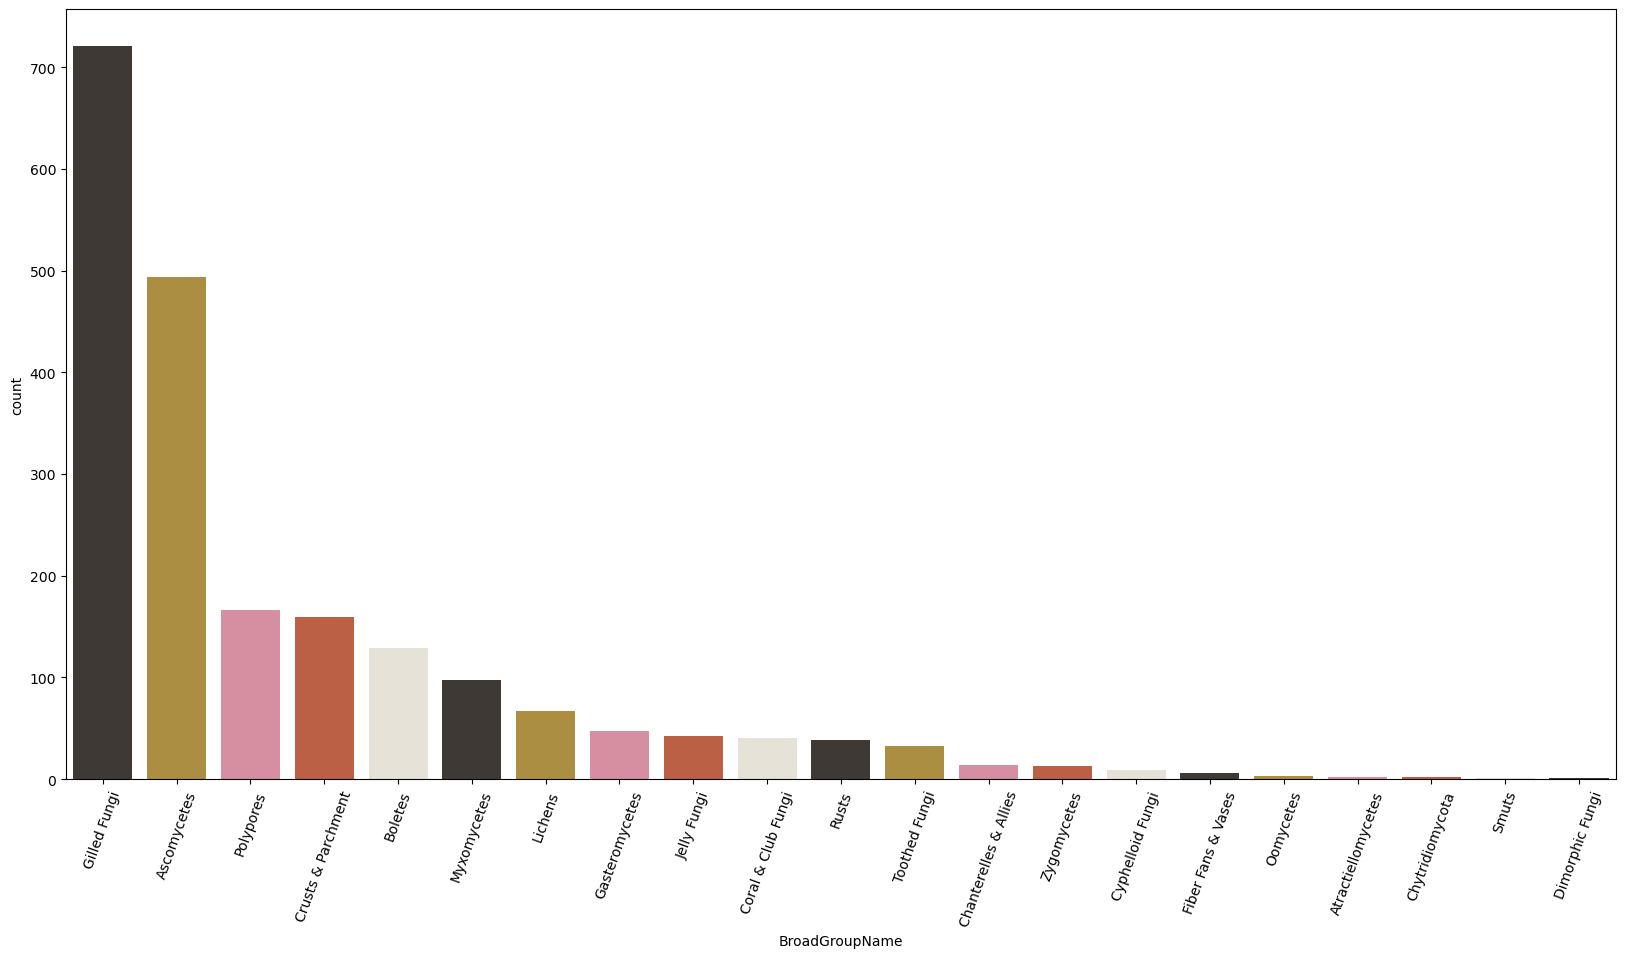

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
group_counts = mushrooms.merge(groups, on='BroadGroupID', how='left')
sns.countplot(data=group_counts, x='BroadGroupName', order=group_counts['BroadGroupName'].value_counts().index, 
              palette=COLORS, ax=ax)
plt.xticks(rotation=70)
;

**Can we break that down by Borough instead?** For this, we'll need:
 - Observations: this will serve as the base table b/c it has the mushroom IDs and the park IDs
 - LEFT JOIN mushrooms on `MushroomID`
 - LEFT JOIN groups on `BroadGroupID`

In [14]:
dfs['observations'].head()

,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,Notes,LinkToINat,DateCreated,DateModified
0,1,300,1,19,y,y,as Boletus campestris,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
1,2,2329,1,19,y,y,NaN,NaN,2023-12-13 21:15:44,2023-12-13 21:15:44
2,3,3,1,19,y,y,(Boletus) pulverulentus,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
3,4,4,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
4,5,5,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21


In [15]:
parks.head()

,ParkID,ParkName,Borough,City,State
0,11,Pelham Bay Park,Bronx,New York City,NY
1,12,High Rock Park,Staten Island,New York City,NY
2,13,Prospect Park,Brooklyn,New York City,NY
3,14,Seton Falls Park,Bronx,New York City,NY
4,15,Kissena Park,Queens,New York City,NY


In [16]:
observations = dfs['observations'].merge(mushrooms[['MushroomID','BroadGroupID','Genus','Species']], 
                                         on='MushroomID', how='left')\
                                  .merge(groups[['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')\
                                  .merge(parks[['ParkID','ParkName','Borough']].dropna(), on='ParkID', how='left')\
                                  .drop(['Notes','LinkToINat','DateCreated','DateModified'], axis=1)
observations.head()

,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,BroadGroupID,Genus,Species,BroadGroupName,ParkName,Borough
0,1,300,1,19,y,y,3.0,Hortiboletus,campestris,Boletes,Central Park,Manhattan
1,2,2329,1,19,y,y,3.0,Boletus,subvelutipes-complex,Boletes,Central Park,Manhattan
2,3,3,1,19,y,y,3.0,Cyanoboletus,pulverulentus,Boletes,Central Park,Manhattan
3,4,4,1,19,y,y,3.0,Gyroporus,castaneus,Boletes,Central Park,Manhattan
4,5,5,1,19,y,y,3.0,Tylopilus,ferrugineus,Boletes,Central Park,Manhattan


''

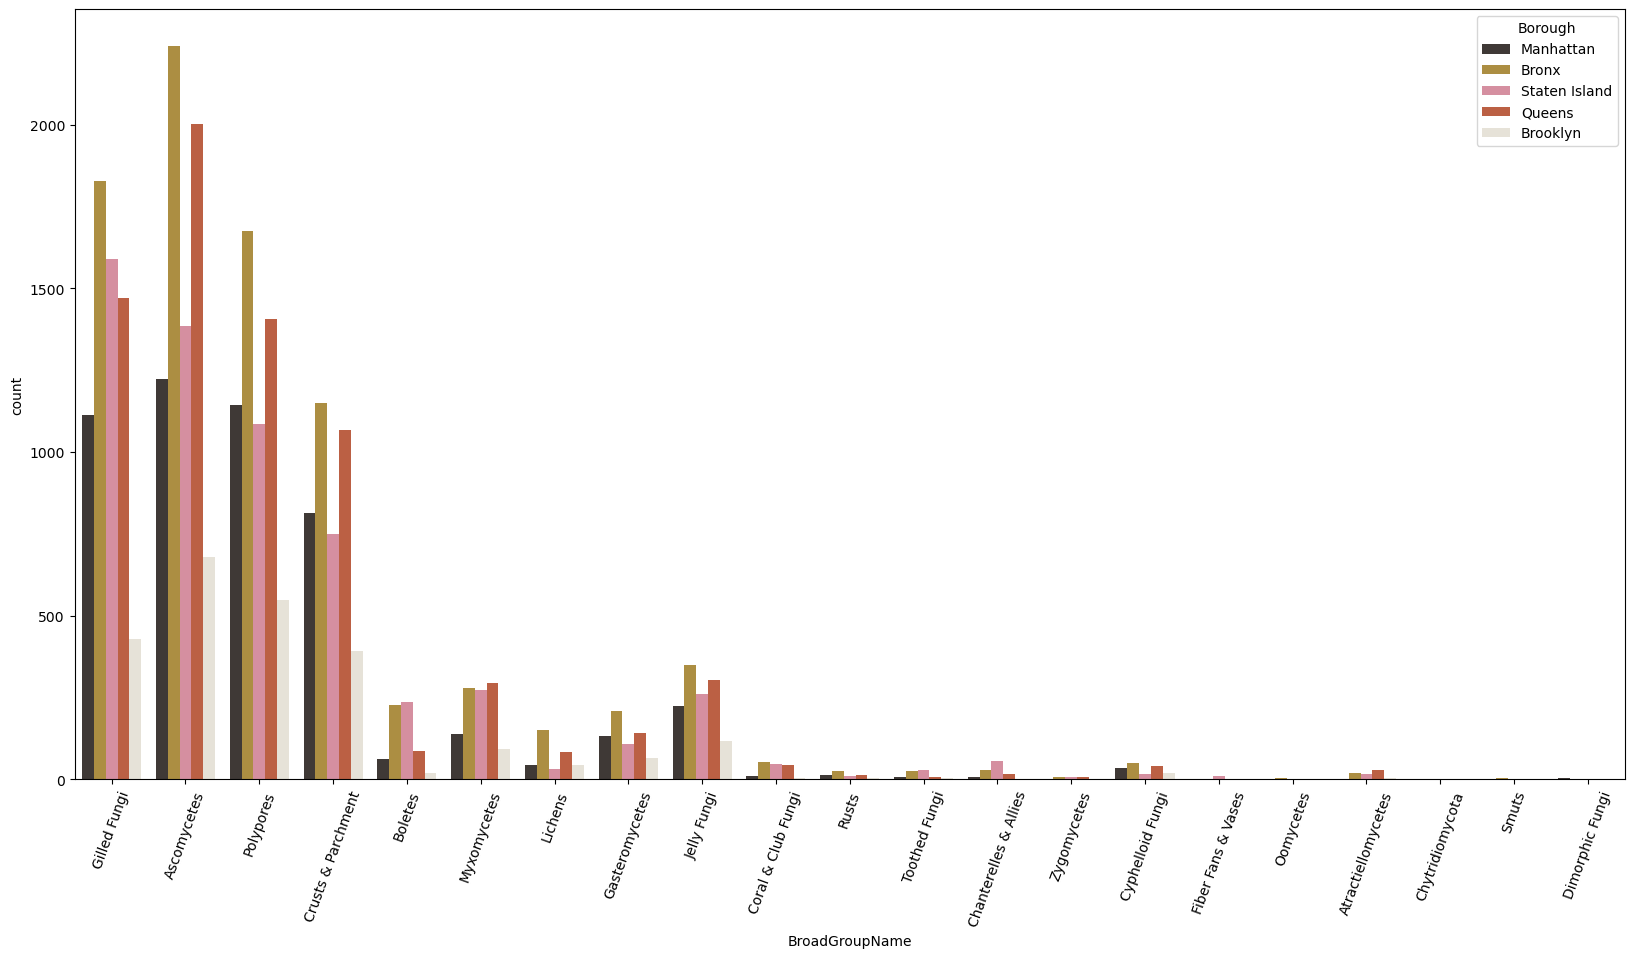

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(observations, x="BroadGroupName", hue="Borough", 
              order=group_counts['BroadGroupName'].value_counts().index,
              palette=COLORS
             )
plt.xticks(rotation=70)
;

What about by park? For this, perhaps it would be best to simply display the top 3 broad group names per park

In [18]:
observations.head()

,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,BroadGroupID,Genus,Species,BroadGroupName,ParkName,Borough
0,1,300,1,19,y,y,3.0,Hortiboletus,campestris,Boletes,Central Park,Manhattan
1,2,2329,1,19,y,y,3.0,Boletus,subvelutipes-complex,Boletes,Central Park,Manhattan
2,3,3,1,19,y,y,3.0,Cyanoboletus,pulverulentus,Boletes,Central Park,Manhattan
3,4,4,1,19,y,y,3.0,Gyroporus,castaneus,Boletes,Central Park,Manhattan
4,5,5,1,19,y,y,3.0,Tylopilus,ferrugineus,Boletes,Central Park,Manhattan


In [19]:
observations.groupby(['ParkName','BroadGroupName']).filter(lambda x: len(x) > 5)

,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,BroadGroupID,Genus,Species,BroadGroupName,ParkName,Borough
0,1,300,1,19,y,y,3.0,Hortiboletus,campestris,Boletes,Central Park,Manhattan
1,2,2329,1,19,y,y,3.0,Boletus,subvelutipes-complex,Boletes,Central Park,Manhattan
2,3,3,1,19,y,y,3.0,Cyanoboletus,pulverulentus,Boletes,Central Park,Manhattan
3,4,4,1,19,y,y,3.0,Gyroporus,castaneus,Boletes,Central Park,Manhattan
4,5,5,1,19,y,y,3.0,Tylopilus,ferrugineus,Boletes,Central Park,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...
34746,36227,3044,587,12,y,NaN,13.0,Puccinia,violae,Rusts,High Rock Park,Staten Island
34747,36228,3121,587,12,y,y,13.0,Uromyces,silphii,Rusts,High Rock Park,Staten Island
34748,36229,3111,587,12,NaN,NaN,13.0,Uromyces,sp.,Rusts,High Rock Park,Staten Island
34749,36230,349,587,12,NaN,NaN,2.0,Hydnellum,spongiosipes,Toothed Fungi,High Rock Park,Staten Island


In [20]:
observations.groupby('ParkName')['BroadGroupName'].value_counts()
# ['BroadGroupName'].value_counts(normalize=True)

ParkName           BroadGroupName       
Alley Pond Park    Ascomycetes              627
                   Gilled Fungi             467
                   Polypores                407
                   Crusts & Parchment       294
                   Myxomycetes               87
                                           ... 
Woodlawn Cemetery  Myxomycetes                9
                   Coral & Club Fungi         7
                   Toothed Fungi              3
                   Chanterelles & Allies      2
                   Cyphelloid Fungi           2
Name: count, Length: 254, dtype: int64

In [21]:
observations.groupby('ParkName')['BroadGroupName'].value_counts(normalize=True)

ParkName           BroadGroupName       
Alley Pond Park    Ascomycetes              0.294920
                   Gilled Fungi             0.219661
                   Polypores                0.191439
                   Crusts & Parchment       0.138288
                   Myxomycetes              0.040922
                                              ...   
Woodlawn Cemetery  Myxomycetes              0.011139
                   Coral & Club Fungi       0.008663
                   Toothed Fungi            0.003713
                   Chanterelles & Allies    0.002475
                   Cyphelloid Fungi         0.002475
Name: proportion, Length: 254, dtype: float64

''

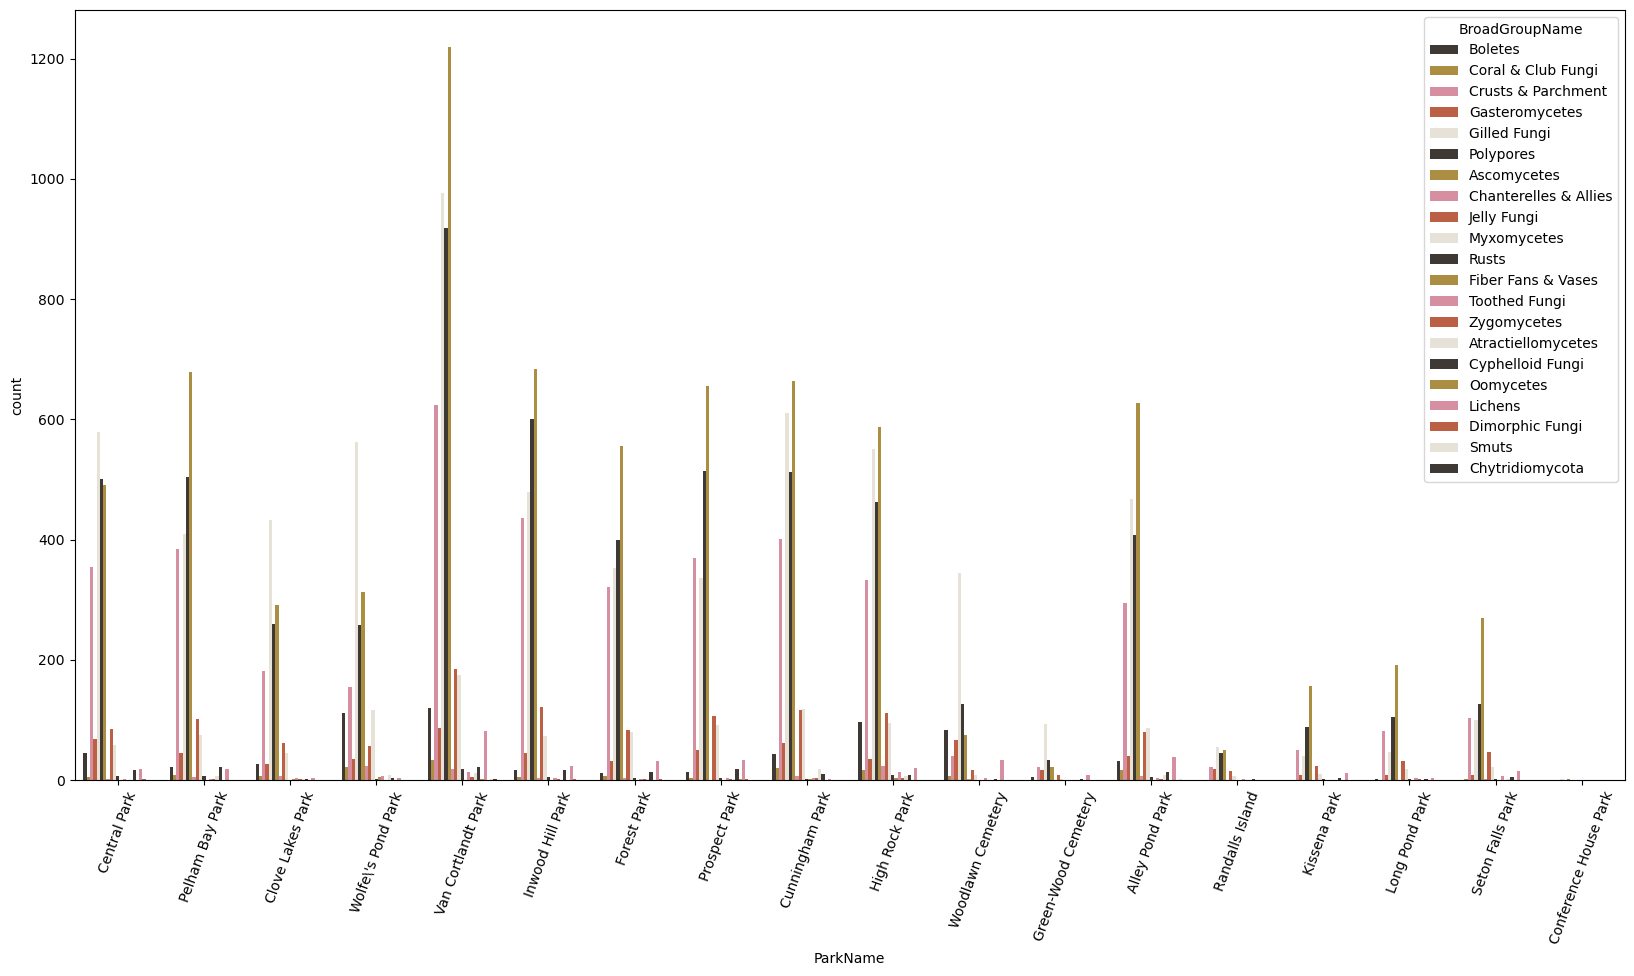

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(observations, x="ParkName", hue="BroadGroupName", palette=COLORS)
plt.xticks(rotation=70)
;

### What fungi is consistently seen all year long?

Try by `BoradGroupName` in addition to `Genus` and `Species`.

In [23]:
observations = dfs['observations'].merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], 
                                         on='MushroomID', how='left')\
                                  .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')\
                                  .drop(['Notes','LinkToINat','NewToPark','NewToCity','ParkID',
                                         'WalkID','ObservationID','DateModified'], axis=1)
observations['Date'] = observations['DateCreated'].dt.normalize()
observations['Month'] = observations['DateCreated'].dt.month
observations.head()

,MushroomID,DateCreated,BroadGroupID,Genus,Species,BroadGroupName,Date,Month
0,300,2023-12-11 16:39:21,3.0,Hortiboletus,campestris,Boletes,2023-12-11,12
1,2329,2023-12-13 21:15:44,3.0,Boletus,subvelutipes-complex,Boletes,2023-12-13,12
2,3,2023-12-11 16:39:21,3.0,Cyanoboletus,pulverulentus,Boletes,2023-12-11,12
3,4,2023-12-11 16:39:21,3.0,Gyroporus,castaneus,Boletes,2023-12-11,12
4,5,2023-12-11 16:39:21,3.0,Tylopilus,ferrugineus,Boletes,2023-12-11,12


In [24]:
observations['Month'].value_counts()

Month
12    31406
1       953
8       723
5       616
7       407
4       327
3       301
9       280
2       189
6        72
Name: count, dtype: int64

''

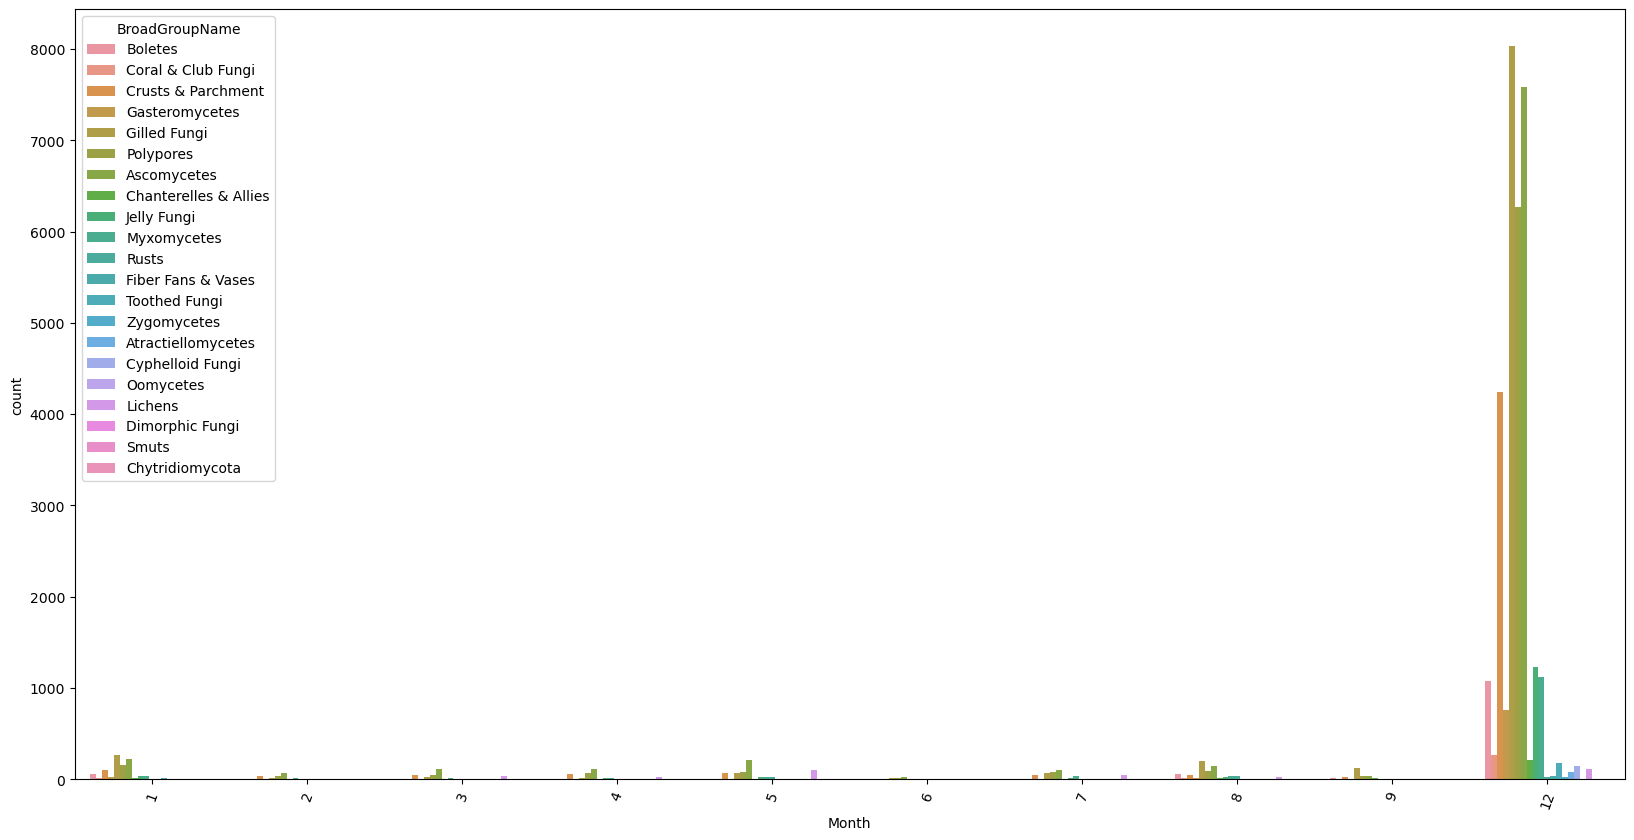

In [25]:
# Sanity check for dates
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(observations, x='Month', hue='BroadGroupName')
plt.xticks(rotation=70)
;

Something is going on with the data here--why are there so many more observations from last December, and specifically December 10?

*Solved:* It turns out that the `Observations` table dates only go back to December 2023, perhaps when the table itself was populated, but they do link to observations from `Walks` dating back to 2009. Don't use the date columns from the `Observations` table to timestamp specific mushroom observations. Instead, join in `Walks` and use the `WalkDate`.

In [26]:
observations = dfs['observations'].merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], 
                                         on='MushroomID', how='left')\
                                  .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')\
                                  .merge(dfs['walks'][['WalkID','ParkID','WalkDate']])\
                                  .drop(['Notes','LinkToINat','NewToPark','NewToCity','ParkID',
                                         'WalkID','ObservationID','DateCreated','DateModified'], axis=1)
observations['Date'] = observations['WalkDate'].dt.normalize()
months = {1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June',
          7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
observations['Month'] = observations['WalkDate'].dt.month.map(months)
observations.head()

,MushroomID,BroadGroupID,Genus,Species,BroadGroupName,WalkDate,Date,Month
0,300,3.0,Hortiboletus,campestris,Boletes,2009-06-28,2009-06-28,June
1,2329,3.0,Boletus,subvelutipes-complex,Boletes,2009-06-28,2009-06-28,June
2,3,3.0,Cyanoboletus,pulverulentus,Boletes,2009-06-28,2009-06-28,June
3,4,3.0,Gyroporus,castaneus,Boletes,2009-06-28,2009-06-28,June
4,5,3.0,Tylopilus,ferrugineus,Boletes,2009-06-28,2009-06-28,June


In [27]:
observations['Date'].describe()

count                            35105
mean     2019-03-11 18:31:18.501637888
min                2009-06-28 00:00:00
25%                2016-07-04 00:00:00
50%                2019-02-16 00:00:00
75%                2022-08-28 00:00:00
max                2024-09-09 00:00:00
Name: Date, dtype: object

In [28]:
observations['Month'].value_counts()

Month
July     4634
Aug      4223
Oct      3523
June     3273
Nov      3184
Sep      2936
Jan      2537
Dec      2336
May      2286
March    2265
April    1994
Feb      1914
Name: count, dtype: int64

That's much better. Now we can actually attempt to answer the question.

In [29]:
# https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas
df = observations.groupby(['Month']).BroadGroupName.value_counts().groupby(level=0, group_keys=False).head(5)
df

Month  BroadGroupName    
April  Ascomycetes            710
       Polypores              469
       Crusts & Parchment     321
       Gilled Fungi           190
       Jelly Fungi            108
Aug    Gilled Fungi          1487
       Ascomycetes            690
       Polypores              587
       Boletes                458
       Crusts & Parchment     309
Dec    Ascomycetes            689
       Polypores              509
       Crusts & Parchment     450
       Gilled Fungi           394
       Jelly Fungi            132
Feb    Ascomycetes            695
       Polypores              452
       Crusts & Parchment     344
       Gilled Fungi           171
       Jelly Fungi            114
Jan    Ascomycetes            838
       Polypores              589
       Crusts & Parchment     473
       Gilled Fungi           304
       Jelly Fungi            159
July   Gilled Fungi          1563
       Ascomycetes            810
       Polypores              727
       Boletes        

''

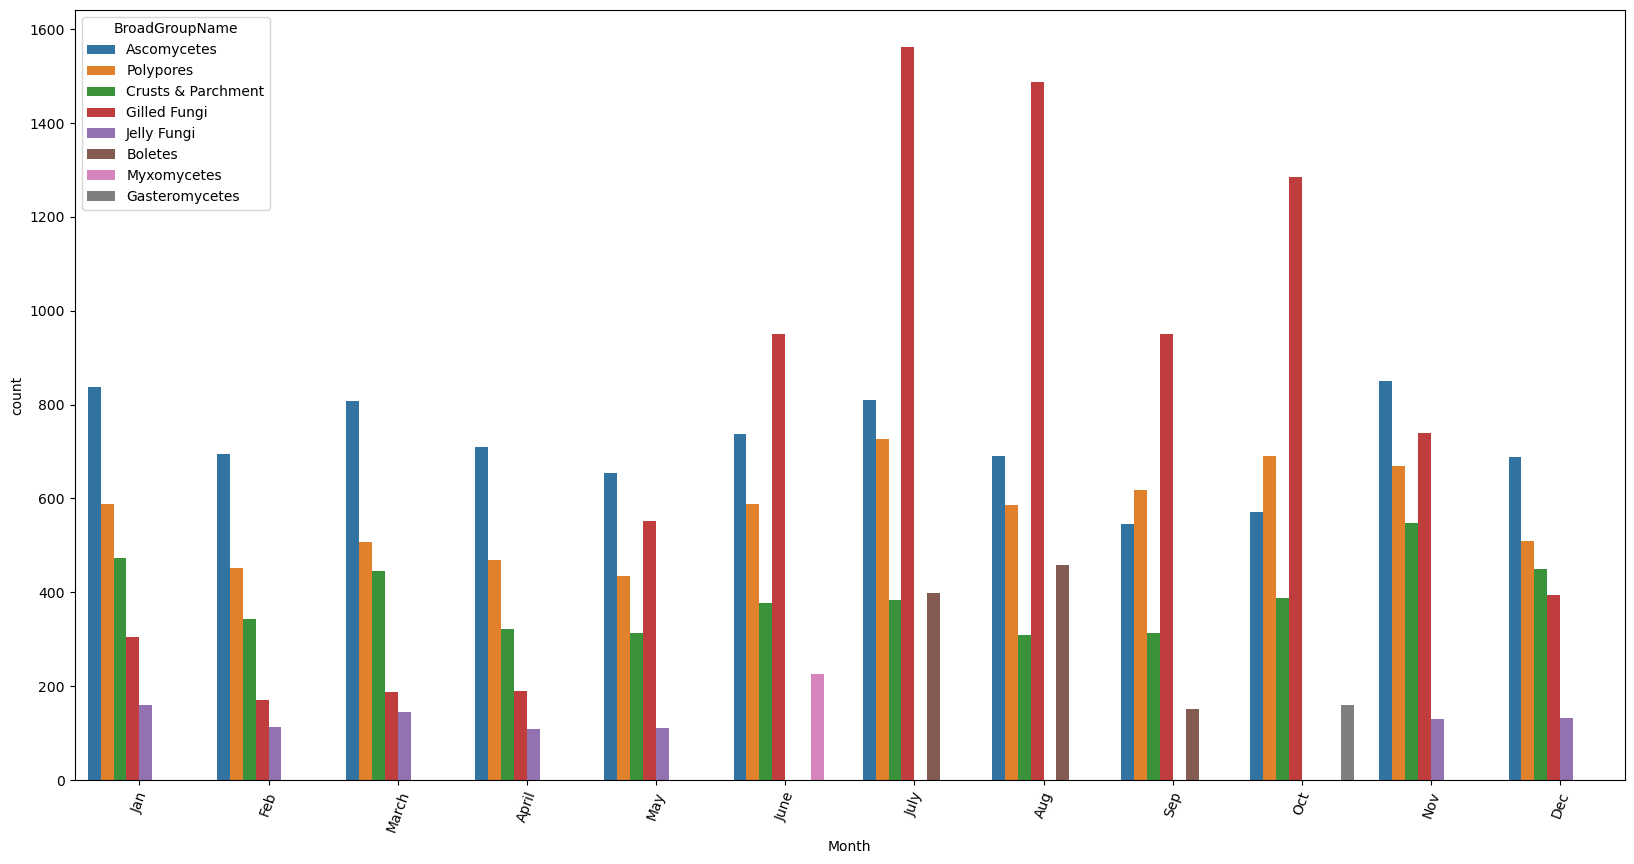

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
df = (
    observations
    .groupby(['Month'])
    .BroadGroupName.value_counts()
    .groupby(level=0, group_keys=False).head(5)
    .reset_index()
)
sns.barplot(df, x='Month', y='count', hue='BroadGroupName', 
            order=months.values())
plt.xticks(rotation=70)
;

Unsurprisingly, **Gilled Fungi** are the most commonly found late spring through fall. However, **Ascomycetes** and **Polypores** are, perhaps also unsurprisingly, the most commonly found overall all year long.

''

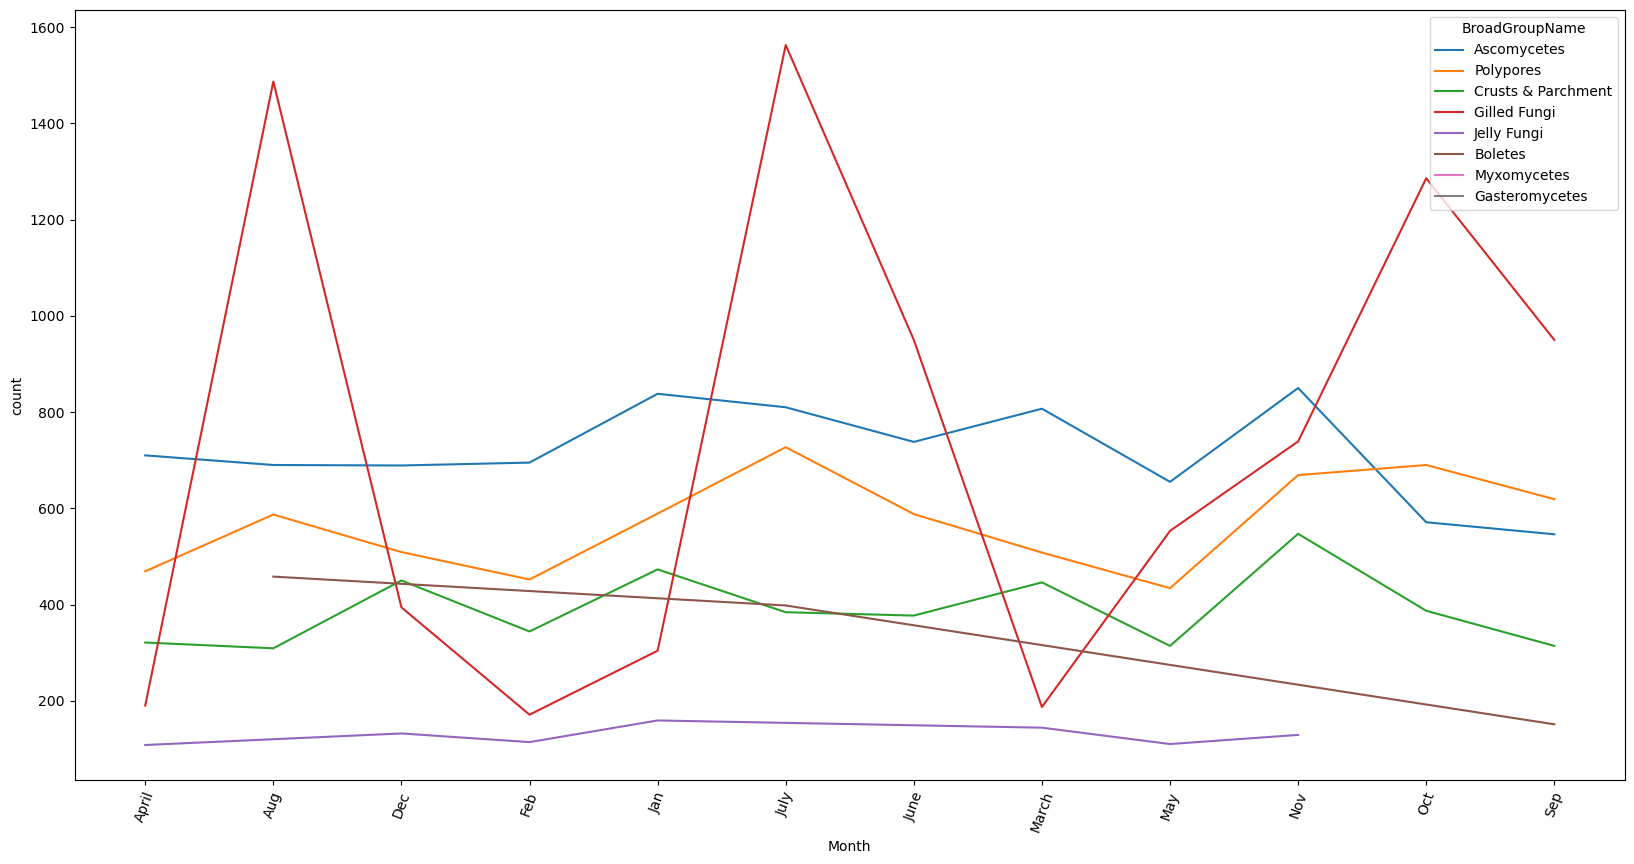

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
df = (
    observations
    .groupby(['Month'])
    .BroadGroupName.value_counts()
    .groupby(level=0, group_keys=False).head(5)
    .reset_index()
)
sns.lineplot(df, x='Month', y='count', hue='BroadGroupName') #, order=months.values())
plt.xticks(rotation=70)
;

Need to fix month order. Perhaps translate months back into numbers (1-12) and then use a string formatter/mapping function in the actual drawing of the axis.

### Which parks are the most fungally diverse?

In [32]:
for table in list(dfs.keys()):
    print(table.upper())
    display(dfs[table].head())
    print('\n----------\n')

PARKS


,ParkID,ParkName,Borough,City,State
0,11,Pelham Bay Park,Bronx,New York City,NY
1,12,High Rock Park,Staten Island,New York City,NY
2,13,Prospect Park,Brooklyn,New York City,NY
3,14,Seton Falls Park,Bronx,New York City,NY
4,15,Kissena Park,Queens,New York City,NY



----------

BROADGROUPS


,BroadGroupID,BroadGroupName,BroadGroupDesc
0,1,Ascomycetes,Ascomycetes are fungi that form sexual spores ...
1,2,Toothed Fungi,Toothed Fungi are a polyphyletic group of Basi...
2,3,Boletes,NaN
3,4,Chanterelles & Allies,NaN
4,5,Coral & Club Fungi,NaN



----------

PARKS_PROPERTIES_20241008


,ACQUISITIONDATE,ACRES,ADDRESS,BOROUGH,CLASS,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,EAPPLY,GISOBJID,GISPROPNUM,GlobalID,JURISDICTION,LOCATION,MAPPED,NAME311,NYS_ASSEMBLY,NYS_SENATE,OBJECTID,OMPPROPID,PARENTID,PERMIT,PERMITDISTRICT,PERMITPARENT,PIP_RATABLE,PRECINCT,RETIRED,SIGNNAME,SUBCATEGORY,TYPECATEGORY,URL,US_CONGRESS,WATERFRONT,ZIPCODE,Multipolygon
0,1937-06-01,249.389,NaN,Q,PARK,401403404406,1.921222e+09,Q-03,Grand Central Parkway Ext,100000441.0,Q084A,14567485-5E02-4AD0-B8B6-516D78FC8636,DPR/CDOT/SDOT,"Astoria Blvd. and 48 St. to Union Tp., Park Dr...",True,Grand Central Parkway Extension,273536.0,13141516.0,15508,Q084A,Q-03,True,Q-03,Q-03,False,114,False,Grand Central Parkway Extension,EXWY,Parkway,http://www.nycgovparks.org/parks/Q084A/,614.0,True,11103113671136811369113701137111375,MULTIPOLYGON (((-73.8587476480729 40.767414466...
1,1936-12-08,0.327,106 SOUTH 3 STREET,B,PARK,301,3.400000e+01,B-01,Berry Playground,100003860.0,B154,DD571D1C-CB51-4FD2-947F-4619889C6CA4,DPR,S. 3 St. bet. Berry St. and Bedford Ave.,True,Berry Playground,50.0,18.0,5084,B154,B-01,True,B-01,B-01,True,90,False,Berry Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B154/,7.0,False,11211,MULTIPOLYGON (((-73.96319254851623 40.71267695...
2,1935-09-23,2.525,225 NEVINS STREET,B,PARK,306,3.900000e+01,B-06,Thomas Greene Playground,100004507.0,B145,803EA01B-766F-48E0-939F-DC5F4A73BD07,DPR,"Nevins St., 3 Ave., bet. De Graw St. and Dougl...",True,Thomas Greene Playground,52.0,26.0,5083,B145,B-06,True,B-06,B-06,True,78,False,Thomas Greene Playground,Neighborhood Plgd,Community Park,http://www.nycgovparks.org/parks/B145/,10.0,False,11217,MULTIPOLYGON (((-73.98430020422195 40.68021747...
3,1947-12-30,2.836,20 HOUSTON STREET,R,PARK,501,5.000000e+01,R-01,Markham Playground,100004986.0,R076,3483912E-D35D-47E7-8BEA-BC0140025A1A,DPR/DOE,"Willowbrook Pkwy., Forest Ave. to Houston St.",True,Markham Playground,61.0,24.0,5065,R076,R-01,True,R-01,R-01,True,120,False,Markham Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/R076/,11.0,False,10302,MULTIPOLYGON (((-74.14513986569457 40.62340561...
4,1955-04-21,3.593,200 ADELAIDE AVENUE,R,PARK,503,5.000000e+01,R-03,Clawson Playground,100004661.0,R072,EB27DEB0-D928-4D42-B907-6A9DE8151275,DPR/DOE,"Adelaide Ave., Clawson St.",False,Clawson Playground,64.0,24.0,5063,R072,R-03,True,R-03,R-03,True,122,False,Clawson Playground,JOP,Jointly Operated Playground,http://www.nycgovparks.org/parks/R072/,11.0,False,10306,MULTIPOLYGON (((-74.12480224365221 40.56108399...



----------

MUSHROOM


,MushroomID,BroadGroupID,Genus,Species,WhyOrWhyNot,DateCreated,DateModified
0,3,3,Cyanoboletus,pulverulentus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
1,4,3,Gyroporus,castaneus,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56
2,5,3,Tylopilus,ferrugineus,other,2020-04-12 16:53:56,2021-06-24 15:59:48
3,6,3,Xerocomellus,chrysenteron,other,2020-04-12 16:53:56,2021-06-24 19:00:51
4,7,5,Clavulina,cinerea,NaN,2020-04-12 16:53:56,2020-04-12 16:53:56



----------

WALKS


,WalkID,ParkID,WalkDate,WalkDescription,WalkPhoto,DateCreated,DateModified
0,1,19,2009-06-28,This is the first walk for which we have data....,NaN,2023-12-13 21:18:04,2023-12-13 21:18:04
1,2,11,2009-07-11,,NaN,2021-06-24 20:22:14,2021-06-24 20:22:14
2,3,20,2009-07-12,,NaN,2021-08-23 16:32:49,2021-08-23 16:32:49
3,4,19,2010-06-27,,NaN,2022-10-28 14:15:11,2022-10-28 14:15:11
4,5,21,2010-08-07,,NaN,2021-08-10 23:06:38,2021-08-10 23:06:38



----------

OBSERVATIONS


,ObservationID,MushroomID,WalkID,ParkID,NewToPark,NewToCity,Notes,LinkToINat,DateCreated,DateModified
0,1,300,1,19,y,y,as Boletus campestris,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
1,2,2329,1,19,y,y,NaN,NaN,2023-12-13 21:15:44,2023-12-13 21:15:44
2,3,3,1,19,y,y,(Boletus) pulverulentus,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
3,4,4,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21
4,5,5,1,19,y,y,NaN,NaN,2023-12-11 16:39:21,2023-12-11 16:39:21



----------



In [33]:
%%time
parks = (
    dfs['observations']
    .merge(dfs['parks'], on='ParkID', how='left')
    .merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], on='MushroomID', how='left')
    .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')
    .drop(['Notes','LinkToINat','ParkID','WalkID',
           'ObservationID','DateCreated','DateModified'], axis=1)
)
parks['Genus'] = parks['Genus'].str.strip()
parks['Species'] = parks['Species'].str.strip()
parks['FullName'] = parks.apply(lambda x: f"{x['Genus']} {x['Species']}", axis=1)
parks.head()

CPU times: user 480 ms, sys: 26.8 ms, total: 507 ms
Wall time: 785 ms


,MushroomID,NewToPark,NewToCity,ParkName,Borough,City,State,BroadGroupID,Genus,Species,BroadGroupName,FullName
0,300,y,y,Central Park,Manhattan,New York City,NY,3.0,Hortiboletus,campestris,Boletes,Hortiboletus campestris
1,2329,y,y,Central Park,Manhattan,New York City,NY,3.0,Boletus,subvelutipes-complex,Boletes,Boletus subvelutipes-complex
2,3,y,y,Central Park,Manhattan,New York City,NY,3.0,Cyanoboletus,pulverulentus,Boletes,Cyanoboletus pulverulentus
3,4,y,y,Central Park,Manhattan,New York City,NY,3.0,Gyroporus,castaneus,Boletes,Gyroporus castaneus
4,5,y,y,Central Park,Manhattan,New York City,NY,3.0,Tylopilus,ferrugineus,Boletes,Tylopilus ferrugineus


In [34]:
parks.groupby('ParkName').BroadGroupName.nunique().reset_index().head()

,ParkName,BroadGroupName
0,Alley Pond Park,17
1,Beech Brook,17
2,Central Park,15
3,Clove Lakes Park,16
4,Collis P. Huntingdon Park,14


''

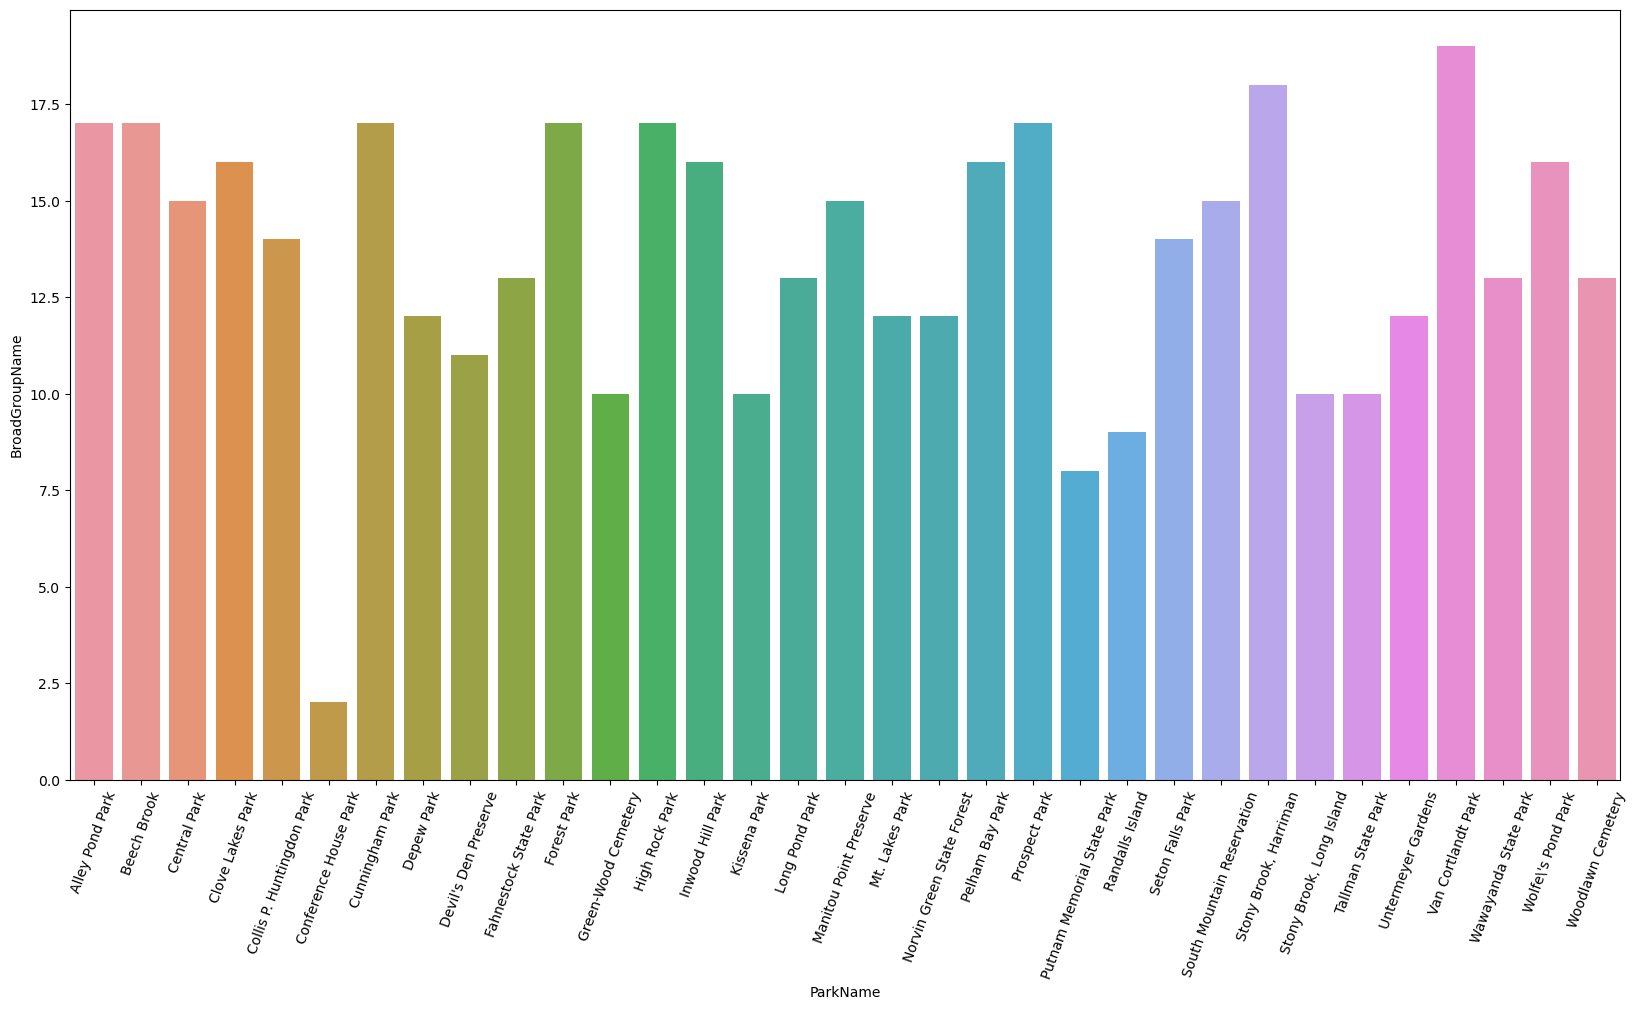

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=parks.groupby('ParkName').BroadGroupName.nunique().reset_index(),
            x='ParkName',y='BroadGroupName')
plt.xticks(rotation=70)
;

In [36]:
display(
    parks.loc[parks['NewToPark']=='y']
    .groupby(['ParkName'])
    .BroadGroupName.value_counts()
    .groupby(level=0, group_keys=True).head()
)

ParkName           BroadGroupName    
Alley Pond Park    Gilled Fungi          168
                   Ascomycetes           126
                   Polypores              54
                   Crusts & Parchment     49
                   Myxomycetes            27
                                        ... 
Woodlawn Cemetery  Gilled Fungi          128
                   Ascomycetes            39
                   Polypores              39
                   Boletes                33
                   Gasteromycetes         20
Name: count, Length: 160, dtype: int64

Genus-species is better than broad group for diversity.

In [37]:
parks.groupby('ParkName')['FullName'].nunique().sort_values(ascending=False)

ParkName
Van Cortlandt Park            806
High Rock Park                621
Stony Brook, Harriman         616
Cunningham Park               562
Alley Pond Park               544
Inwood Hill Park              542
Pelham Bay Park               531
Beech Brook                   518
Wolfe\'s Pond Park            510
Forest Park                   492
Central Park                  472
Prospect Park                 471
Clove Lakes Park              433
South Mountain Reservation    384
Woodlawn Cemetery             349
Collis P. Huntingdon Park     261
Seton Falls Park              260
Wawayanda State Park          253
Depew Park                    243
Long Pond Park                213
Fahnestock State Park         192
Manitou Point Preserve        190
Untermeyer Gardens            189
Kissena Park                  184
Tallman State Park            174
Mt. Lakes Park                148
Green-Wood Cemetery           147
Devil's Den Preserve          145
Norvin Green State Forest     143
Randa

''

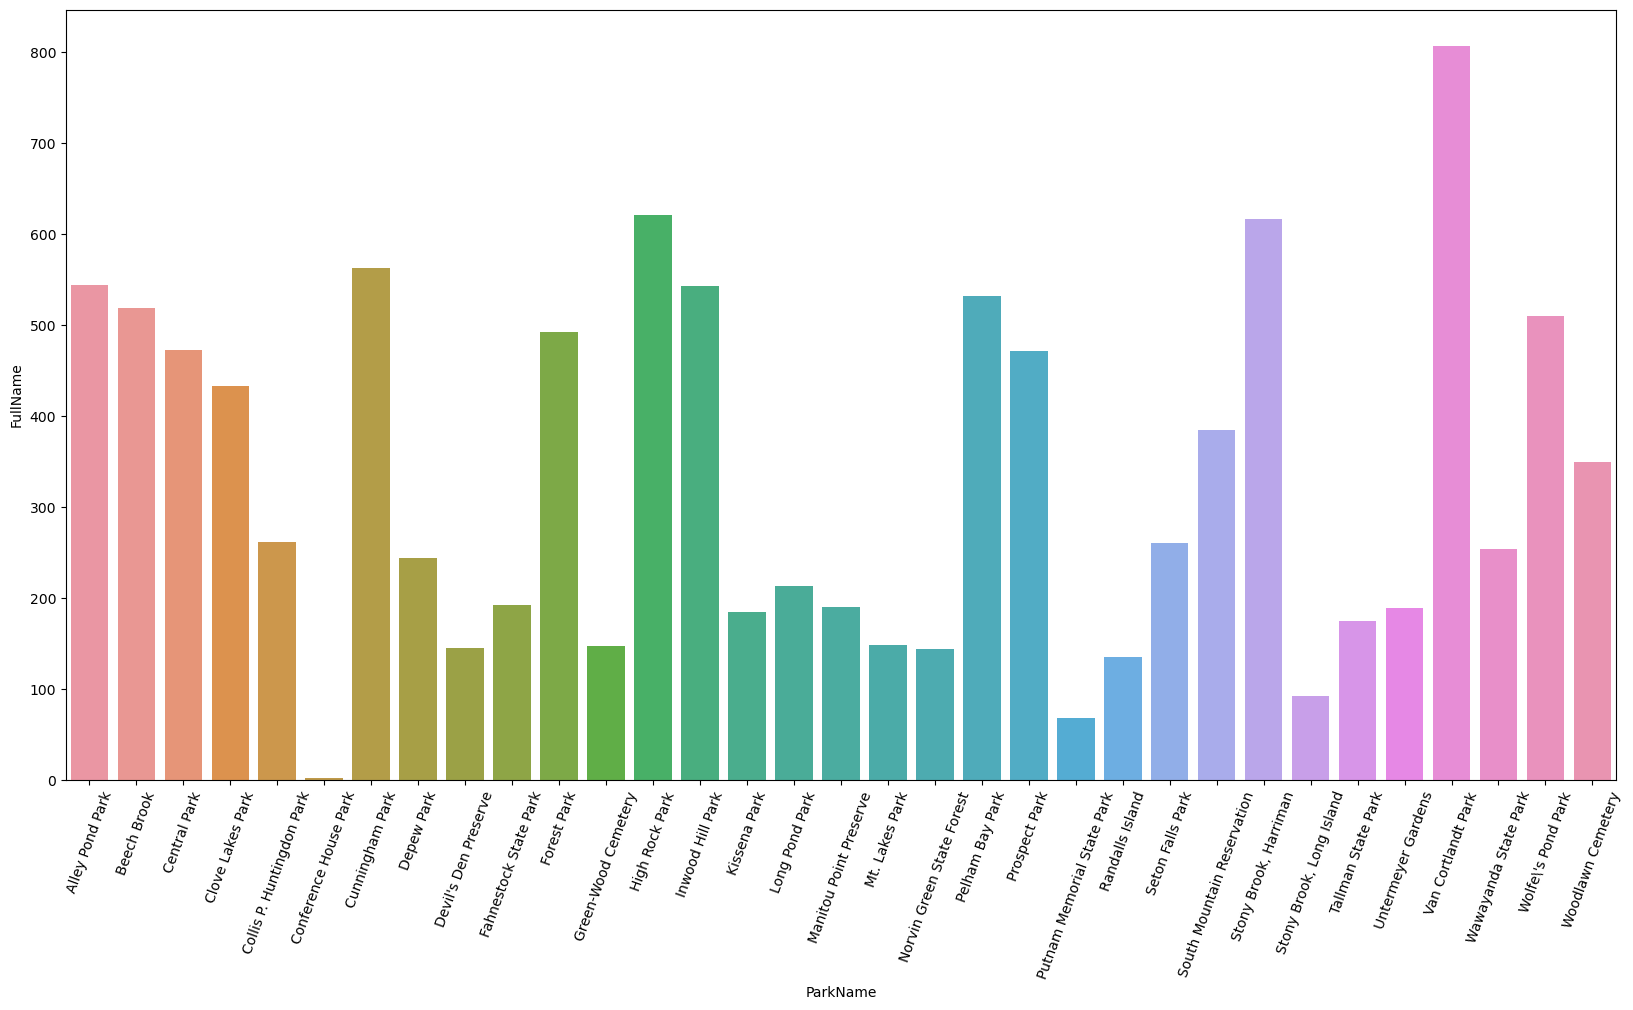

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=parks.groupby('ParkName')['FullName'].nunique().reset_index(),
            x='ParkName',y='FullName')
plt.xticks(rotation=70)
;

Can group by borough? Add a label to show?

### Is anything on a decline / are there any species becoming observed less frequently?

Let's look at species change over time similar to the lineplot above, but instead of grouped by month we'll just look at all time.

In [39]:
observations = dfs['observations'].merge(dfs['mushroom'][['MushroomID','BroadGroupID','Genus','Species']], 
                                         on='MushroomID', how='left')\
                                  .merge(dfs['broadgroups'][['BroadGroupID','BroadGroupName']], on='BroadGroupID', how='left')\
                                  .merge(dfs['walks'][['WalkID','ParkID','WalkDate']])\
                                  .drop(['Notes','LinkToINat','NewToPark','NewToCity','ParkID',
                                         'WalkID','ObservationID','DateCreated','DateModified'], axis=1)
observations['Date'] = observations['WalkDate'].dt.normalize()
months = {1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June',
          7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
observations['Month'] = observations['WalkDate'].dt.month.map(months)
observations['Week'] = observations.apply(lambda x: x['WalkDate'].isocalendar()[1], axis=1)
observations['Year'] = observations.apply(lambda x: x['WalkDate'].isocalendar()[0], axis=1)
observations['Month_Year'] = observations.apply(lambda x: f"{x['Month']}, {x['Year']}", axis=1)
observations['Week_Year'] = observations.apply(lambda x: f"Week {x['Week']}, {x['Year']}", axis=1)
observations['Quarter'] = observations['WalkDate'].dt.quarter
observations['Quarter_Year'] = observations.apply(lambda x: f"Q{x['Quarter']}, {x['Year']}", axis=1)
observations.head()

,MushroomID,BroadGroupID,Genus,Species,BroadGroupName,WalkDate,Date,Month,Week,Year,Month_Year,Week_Year,Quarter,Quarter_Year
0,300,3.0,Hortiboletus,campestris,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"
1,2329,3.0,Boletus,subvelutipes-complex,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"
2,3,3.0,Cyanoboletus,pulverulentus,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"
3,4,3.0,Gyroporus,castaneus,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"
4,5,3.0,Tylopilus,ferrugineus,Boletes,2009-06-28,2009-06-28,June,26,2009,"June, 2009","Week 26, 2009",2,"Q2, 2009"


In [40]:
df = pd.DataFrame(
    observations
    .groupby(['WalkDate'])
    .BroadGroupName.value_counts()
    .rolling(7).mean()
)
# df['rolling_week_mean'] = df.rolling(7).mean()
df

count
WalkDate   BroadGroupName              
2009-06-28 Gilled Fungi             NaN
           Boletes                  NaN
           Polypores                NaN
           Gasteromycetes           NaN
           Crusts & Parchment       NaN
...                                 ...
2024-09-09 Toothed Fungi       5.142857
           Gasteromycetes      4.142857
           Atractiellomycetes  3.285714
           Lichens             2.714286
           Myxomycetes         2.142857

[3964 rows x 1 columns]

In [41]:
df = (
    observations
    .groupby(['WalkDate'])
    .BroadGroupName.value_counts()
    .groupby(level=0, group_keys=False).head(5)
)
# df.count.rolling(7).mean() 
df = df.set_index('WalkDate')
df.rolling(7)

AttributeError: 'Series' object has no attribute 'set_index'

In [ ]:
df['moving'] = df.groupby(['col_1', 'col_2', 'col_3']).rolling(10)['value'].mean().droplevel(level=[0,1,2])


In [ ]:
pd.DataFrame(
    observations
    .loc[observations['BroadGroupName'].isin(top_ten_groups)]
    .groupby('WalkDate')
    .BroadGroupName.value_counts()
    .rolling('7D').mean()
)

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
top_ten_groups = list(observations['BroadGroupName'].value_counts().head(10).index)
df = pd.DataFrame(
    observations
    .loc[observations['BroadGroupName'].isin(top_ten_groups)]
    .groupby(['WalkDate', 'BroadGroupName'])
    .rolling('90D')[]
    .BroadGroupName.value_counts()
    .reset_index()
)
df.index = pd.DatetimeIndex(df['WalkDate'])
df = df.sort_index().drop('WalkDate', axis=1).rolling('90D').mean()
display(df)
sns.lineplot(df, x='WalkDate', y='count', hue='BroadGroupName')
plt.xticks(rotation=30)
;

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1593421294.py, line 4)

''

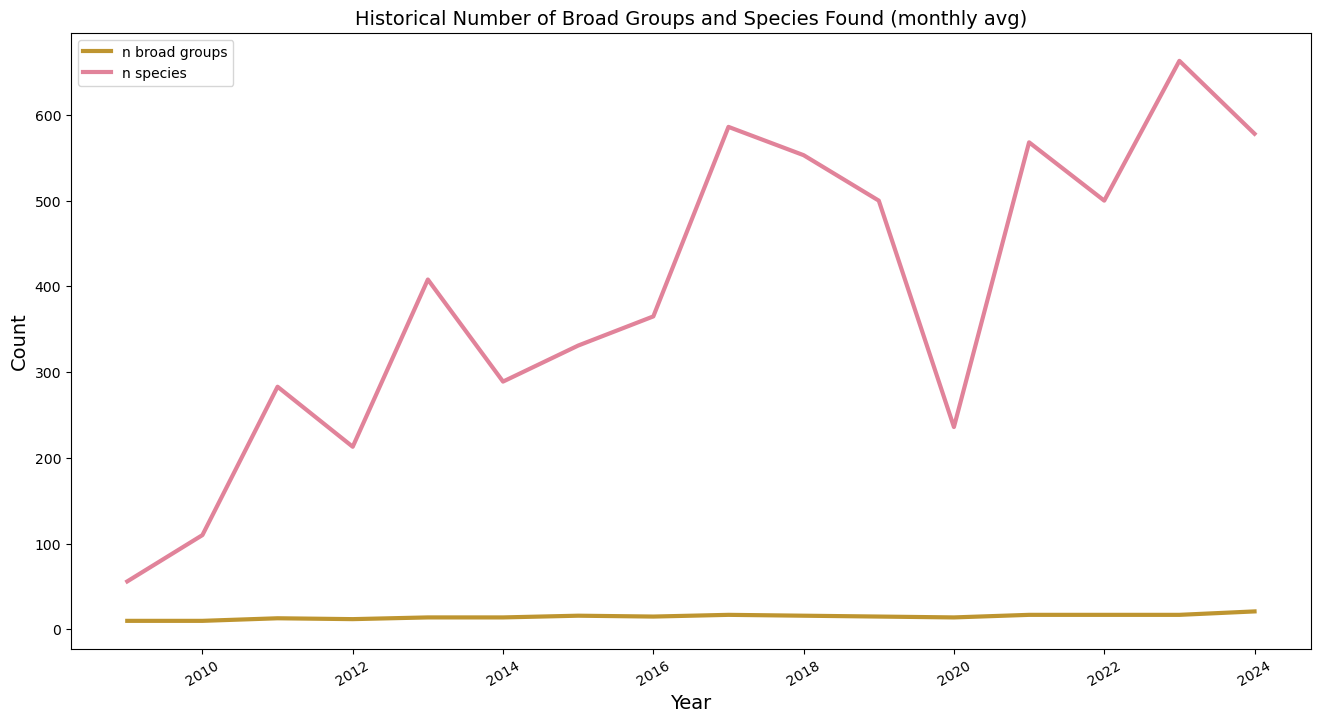

In [43]:
fig, ax = plt.subplots(figsize=(16,8))
rolling = 7
groupby = 'Year'
df_count_of_groups = (
    observations
    .groupby(groupby)
    .BroadGroupName.nunique()
    # .rolling(rolling).mean()
)
df_count_of_species = (
    observations
    .groupby(groupby)
    .Species.nunique()
    # .rolling(rolling).mean()
)
sns.lineplot(df_count_of_groups, color=COLORS[1], label='n broad groups', 
             linewidth=3, ax=ax)
sns.lineplot(df_count_of_species, color=COLORS[2], label='n species',
             linewidth=3, ax=ax)
plt.xlabel(groupby, fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Historical Number of Broad Groups and Species Found (monthly avg)", fontsize=14)
plt.legend()
plt.xticks(rotation=30)
;

What about just seeing general count of groups and species over time?